# DSCI 100 - Group Project Report


### Title
**Classification of Work Recruitment using Grades Percentage**

### Introduction
Many students looking to enter the workforce experience anxiety regarding this process as often resources such as competitive admission averages, and relevant extracurricular courses/degrees are scarce, not publicly accessible, or inaccurate. Prior research has sustained mix results over the relationship between education and success in the job market. For instance, Athey et al. (2007), notes the importance of economic students' first year grades in core courses as notable predictors of job placement, while another literature review by Afarian and Kleiner (2003) struggled to reach a definite conclusion. Additionally, Afarian and Kleiner (2003), pointed out how educators who may publish views on grades as predictors of success rarely do the opposite as doing so would be "a conflict of interest argument against them." Our project aims to tackle this difficulty and provide a more reliable and coherent criteria for students seeking successful job placement. Specifically, this project uses the Campus Recruitment dataset, which tracks candidates who apply and attempts to answer the question of whether an applicant will be placed or not based on their grade percentage. Moreover, this project uses a K-NN classification to evaluate the hypothesis that successful placement is more likely when higher grade percentages are achieved across all educational levels. Therefore, this project is trying to address the question, "What number of K-nearest neighbor is the best at predicting a new observation and how effective is the accuracy, precision, and recall of the chosen model?"

The dataset used for this project is adopted from Kaggle, containing 15 columns or variables:
| Variable | Description                                 |
|--------|---------------------------------------------|
| candidate_id	     | Serial number or unique identifier for each participant in the dataset            |
| gender	     | Gender of the participant (Male or Female)           |
| sec_grade_percent	     | Percentage of marks obtained in Secondary School Certificate (10th Grade)      |
| sec_edu_board	     | The board responsible for conducting the Secondary School Certificate exam. |
| h_sec_grade_percent	     | Percentage of marks obtained in Higher Secondary Certificate (12th Grade)            |
| h_sec_education_board	     |The board responsible for conducting the Higher Secondary Certificate exam.           |
| h_sec_specialization	     | The stream (e.g., Science, Commerce, Arts) chosen by the student in the Higher Secondary Certificate   |
| degree_percent	     | Percentage of marks obtained in the undergraduate degree |
| degree_type	     | Type of undergraduate degree pursued by the student (e.g., Science, Commerce, Arts)           |
| work_experience	     | Whether the student has any work experience (Yes or No)           |
| e_test_percent	     | Percentage of marks obtained in any entrance test      |
| mba_specialization	     | Specialization chosen by the student in their MBA degree |
| mba_percent	     | Percentage of marks obtained in their MBA degree           |
| placement_status	     | Whether the student was placed in a job (Placed or Not Placed)      |
| salary	     | Salary offered to the student upon placement ("Not Placed" students will be marked "NA" in this column) |


### Methods
As the first step, we will load all the package needed in this project which is `tidyverse` and `tidymodels`. After unloading the package, we will then read the dataset `Placement_Data_Full_Class.csv` from the assigned `url` instead of the local file to make our code reproducible.

In [1]:
library(tidyverse)
library(tidymodels)
url <- "https://raw.githubusercontent.com/Chuewy/DSCI100-27/main/Placement_Data_Full_Class.csv"

data <- read_csv(url)
head(data)
tail(data)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NA
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,NA


sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
210,M,62.0,Central,72,Central,Commerce,65.0,Comm&Mgmt,No,67,Mkt&Fin,56.49,Placed,216000
211,M,80.6,Others,82,Others,Commerce,77.6,Comm&Mgmt,No,91,Mkt&Fin,74.49,Placed,400000
212,M,58.0,Others,60,Others,Science,72.0,Sci&Tech,No,74,Mkt&Fin,53.62,Placed,275000
213,M,67.0,Others,67,Others,Commerce,73.0,Comm&Mgmt,Yes,59,Mkt&Fin,69.72,Placed,295000
214,F,74.0,Others,66,Others,Commerce,58.0,Comm&Mgmt,No,70,Mkt&HR,60.23,Placed,204000
215,M,62.0,Central,58,Others,Science,53.0,Comm&Mgmt,No,89,Mkt&HR,60.22,Not Placed,NA


Table 1: First and Last 6 Rows of Raw Placement Dataset

After loading the dataset, we need to tidy up `data` for better interpreation throughout the process. First, we rename each header using `rename` for better context of understanding when reading the dataset. This will also give a better intepreation for readers that are unfamiliar with the dataset background. However, notice that the data itself has considered in a tidy format because each column represents a variable, each row represents an observation, and each single cell represents a single value. So the data itself has been considered tidy without adding any changes. 

In [2]:
tidy_data <- rename(data,
               candidate_id = sl_no,
               gender = gender,
               sec_grade_percent = ssc_p,
               sec_edu_board = ssc_b,
               h_sec_grade_percent = hsc_p,
               h_sec_education_board = hsc_b,
               h_sec_specialization = hsc_s,
               degree_percent = degree_p,
               degree_type = degree_t,
               work_experience = workex,
               e_test_percent = etest_p,
               mba_specialization = specialisation,
               mba_percent = mba_p,
               placement_status = status,
               salary = salary) 

head(tidy_data)
tail(tidy_data)

candidate_id,gender,sec_grade_percent,sec_edu_board,h_sec_grade_percent,h_sec_education_board,h_sec_specialization,degree_percent,degree_type,work_experience,e_test_percent,mba_specialization,mba_percent,placement_status,salary
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NA
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,NA


candidate_id,gender,sec_grade_percent,sec_edu_board,h_sec_grade_percent,h_sec_education_board,h_sec_specialization,degree_percent,degree_type,work_experience,e_test_percent,mba_specialization,mba_percent,placement_status,salary
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
210,M,62.0,Central,72,Central,Commerce,65.0,Comm&Mgmt,No,67,Mkt&Fin,56.49,Placed,216000
211,M,80.6,Others,82,Others,Commerce,77.6,Comm&Mgmt,No,91,Mkt&Fin,74.49,Placed,400000
212,M,58.0,Others,60,Others,Science,72.0,Sci&Tech,No,74,Mkt&Fin,53.62,Placed,275000
213,M,67.0,Others,67,Others,Commerce,73.0,Comm&Mgmt,Yes,59,Mkt&Fin,69.72,Placed,295000
214,F,74.0,Others,66,Others,Commerce,58.0,Comm&Mgmt,No,70,Mkt&HR,60.23,Placed,204000
215,M,62.0,Central,58,Others,Science,53.0,Comm&Mgmt,No,89,Mkt&HR,60.22,Not Placed,NA


Table 2: First and Last 6 Rows of Placement Dataset after `rename`

We will now select our predictors for this project. For this project, we will only use a certain variable for part of the data analysis, specifically the 10th grade percentage `ssc_p`, 12th grade `hsc_p`, degree percentage `degree_p`, test score percentage `etest_p`, mba grade percentage `mba_p`  and placement status `status`. The last thing for us to change our `placement_status` to a `fct` data type.

In [3]:
tidy_data<- select(tidy_data, sec_grade_percent, h_sec_grade_percent, degree_percent, e_test_percent, mba_percent, placement_status) |>
            mutate(placement_status = as.factor(placement_status)) 

head(tidy_data)
tail(tidy_data)

sec_grade_percent,h_sec_grade_percent,degree_percent,e_test_percent,mba_percent,placement_status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
67.00,91.00,58.00,55.0,58.80,Placed
79.33,78.33,77.48,86.5,66.28,Placed
65.00,68.00,64.00,75.0,57.80,Placed
56.00,52.00,52.00,66.0,59.43,Not Placed
85.80,73.60,73.30,96.8,55.50,Placed
55.00,49.80,67.25,55.0,51.58,Not Placed


sec_grade_percent,h_sec_grade_percent,degree_percent,e_test_percent,mba_percent,placement_status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
62.0,72,65.0,67,56.49,Placed
80.6,82,77.6,91,74.49,Placed
58.0,60,72.0,74,53.62,Placed
67.0,67,73.0,59,69.72,Placed
74.0,66,58.0,70,60.23,Placed
62.0,58,53.0,89,60.22,Not Placed


Table 3: First and Last 6 Rows of Placement Dataset after `select`

After renaming the header, we can split the `tidy_data` using `initial_split` to provide 75% proportion for training and the rest for testing. This process is to train our model in a dataset with the purpose of finding the best K, and then test the model in a new dataset that is unfamiliar by the model. The `tidy_data` will be split into `training_data` and `testing_data`, where `training_data` represents the training dataset and `testing_data` represents the testing dataset. We would also neet to use `set.seed` so the code is reproducible accross devices.

In [51]:
set.seed(2024)
tidy_split <- initial_split(tidy_data, prop = 0.75, strata = placement_status)
training_data <- training(tidy_split)
head(training_data)
testing_data <- testing(tidy_split)
head(testing_data)

sec_grade_percent,h_sec_grade_percent,degree_percent,e_test_percent,mba_percent,placement_status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
56,52.0,52.00,66.00,59.43,Not Placed
55,49.8,67.25,55.00,51.58,Not Placed
46,49.2,79.00,74.28,53.29,Not Placed
58,70.0,61.00,54.00,52.21,Not Placed
62,47.0,50.00,76.00,54.96,Not Placed
55,67.0,64.00,60.00,67.28,Not Placed


sec_grade_percent,h_sec_grade_percent,degree_percent,e_test_percent,mba_percent,placement_status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
73.0,79.0,72.00,91.34,61.29,Placed
58.0,61.0,60.00,62.00,60.85,Placed
47.0,55.0,65.00,62.00,65.04,Not Placed
63.0,66.0,64.00,68.00,64.08,Not Placed
69.8,60.8,72.23,55.53,68.81,Placed
76.5,97.7,78.86,97.40,74.01,Placed


Table 4: First 6 Rows for Testing and Training Placement Dataset (75%/25%)

To summarise our dataset, we can start on summarizing our `training_data` using `count` and `mutate` to get a proportion of each `Placed` and `Not Placed` in the `placement_status` variable.

In [5]:
total <- nrow(training_data)

class_count <- training_data |>
               group_by(placement_status) |>
               summarize(
                   count = n()
               ) |>
               mutate(percent = 100*count/total)
class_count

placement_status,count,percent
<fct>,<int>,<dbl>
Not Placed,50,31.0559
Placed,111,68.9441


Table 5: Proportion of `placement_status` in `training_data`

Great! We see that the data is in a pretty good proportion (not boldly imbalance). Now, we can summarise each predictor using `group_by` and `summarize` to get the average of each predictors based on each `placement_status`. And since we don't have any `NA` values in our predictors, there shouldn't be a problem when we don't include `na.rm = TRUE`.

In [6]:
average_predictors <- training_data |>
                      group_by(placement_status) |>
                      summarize(across(sec_grade_percent : mba_percent, mean))

average_predictors

placement_status,sec_grade_percent,h_sec_grade_percent,degree_percent,e_test_percent,mba_percent
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Not Placed,58.21140,59.24900,61.79180,68.60900,62.17180
Placed,71.20414,69.94748,68.59396,73.03991,62.31811


Table 6: Average of each Predictors grouped by `placement_status`

We can see from the result that there seems to be a trend for each `placement_status` where the `Placed` class tends to have a higher value compared to the `Not Placed`. For a better interpretation, we can now enhance the interpretation show the distribution of each predictor.

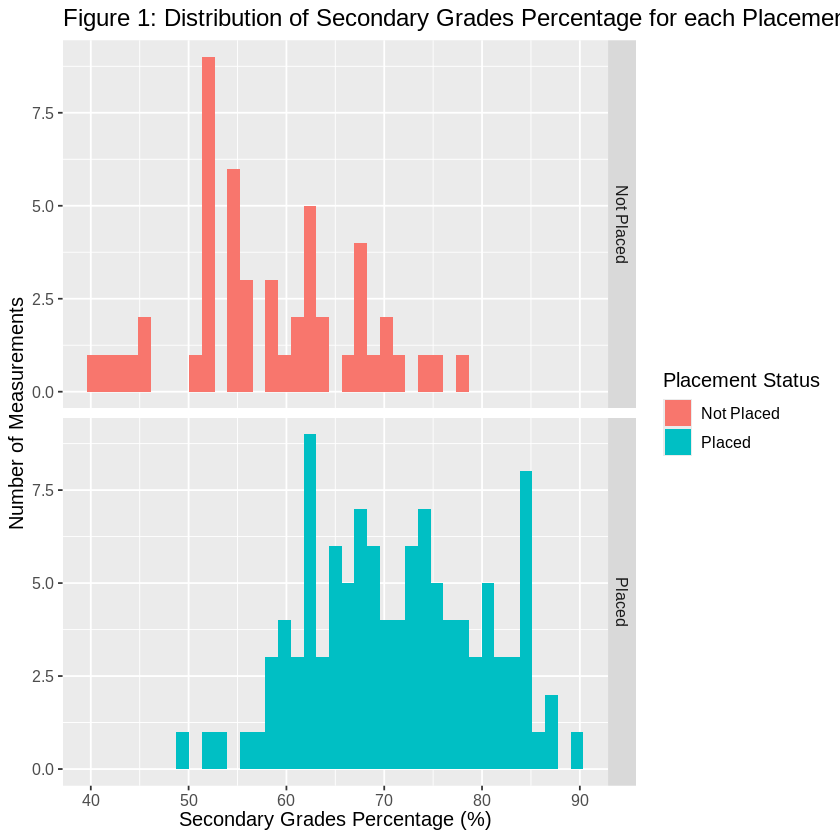

In [56]:
sec_grade_plot <- training_data |>
                   ggplot(aes(x = sec_grade_percent, fill = placement_status)) +
                   geom_histogram(bins = 30, binwidth = 1.3) +
                   facet_grid(rows = vars(placement_status)) +
                   labs(x = "Secondary Grades Percentage (%)",
                   y = "Number of Measurements",
                   fill = "Placement Status") +
                   theme(text = element_text(size = 12)) +
                   ggtitle("Figure 1: Distribution of Secondary Grades Percentage for each Placement.")
sec_grade_plot

From the histogram above, one can notice that the the `Placed` graph is concentrated closer to the seventy and higher range while the `Not Placed` graph is concentrated closer to 60. 

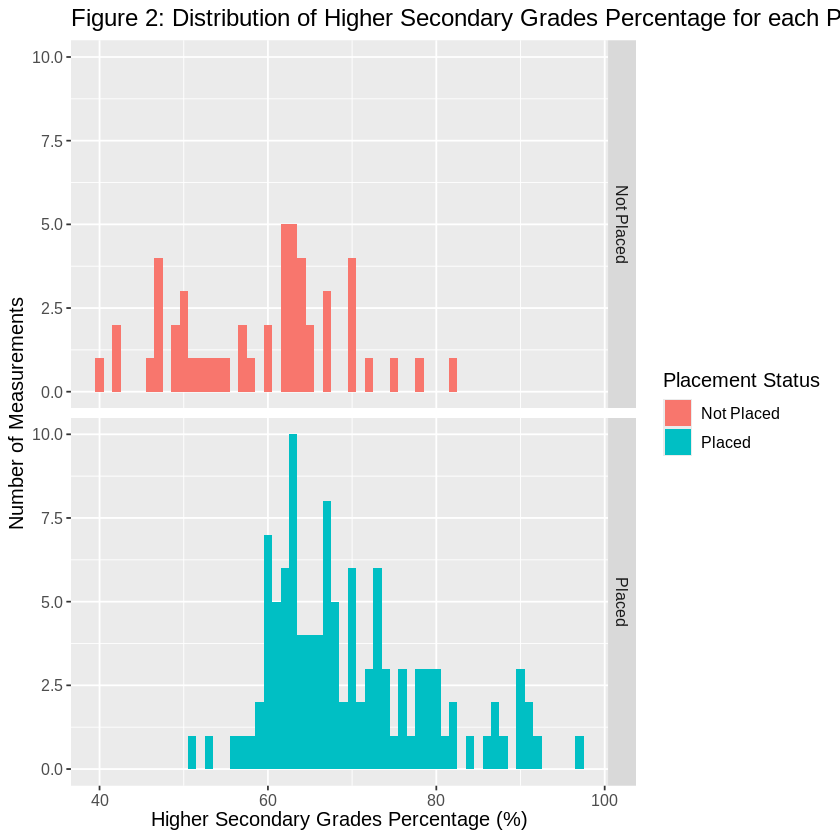

In [62]:
h_sec_plot <- training_data |>
                   ggplot(aes(x = h_sec_grade_percent, fill = placement_status)) +
                   geom_histogram(bins = 30, binwidth = 1) +
                   facet_grid(rows = vars(placement_status)) +
                   labs(x = "Higher Secondary Grades Percentage (%)",
                   y = "Number of Measurements",
                   fill = "Placement Status") +
                   theme(text = element_text(size = 12)) +
                   ggtitle("Figure 2: Distribution of Higher Secondary Grades Percentage for each Placement")
h_sec_plot

Similar to the previous plot, we can see that `Placed` status seems to have a higher average compared to `Not Placed` where the `Placed` status seems to have the distribution centered around 70 and `Not Placed` is approximately centered at 60.

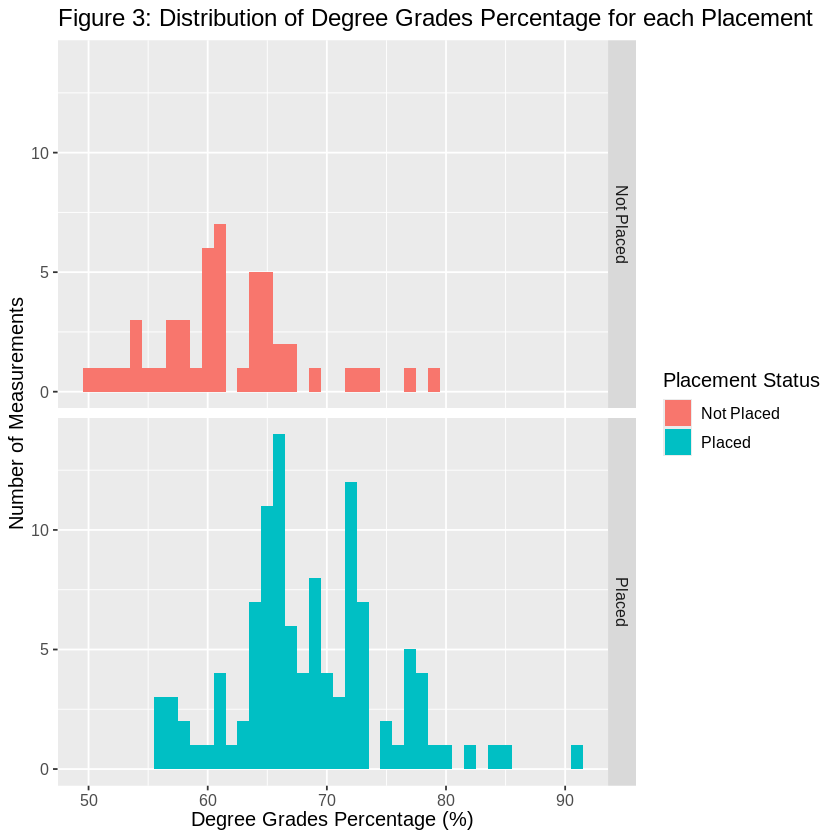

In [61]:
degree_plot <- training_data |>
                   ggplot(aes(x = degree_percent, fill = placement_status)) +
                   geom_histogram(bins = 30, binwidth = 1) +
                   facet_grid(rows = vars(placement_status)) +
                   labs(x = "Degree Grades Percentage (%)",
                   y = "Number of Measurements",
                   fill = "Placement Status") +
                   theme(text = element_text(size = 12)) +
                   ggtitle("Figure 3: Distribution of Degree Grades Percentage for each Placement")
degree_plot

From the histogram above, again, one can notice how `Placed` individuals occupy higher grade percentages than compared to the `Not Placed` individuals. 

<br>
From a glance, the `Placed` graph has a greater concentration of highs in the 70-80% range compared to the `Not Placed` graph. 

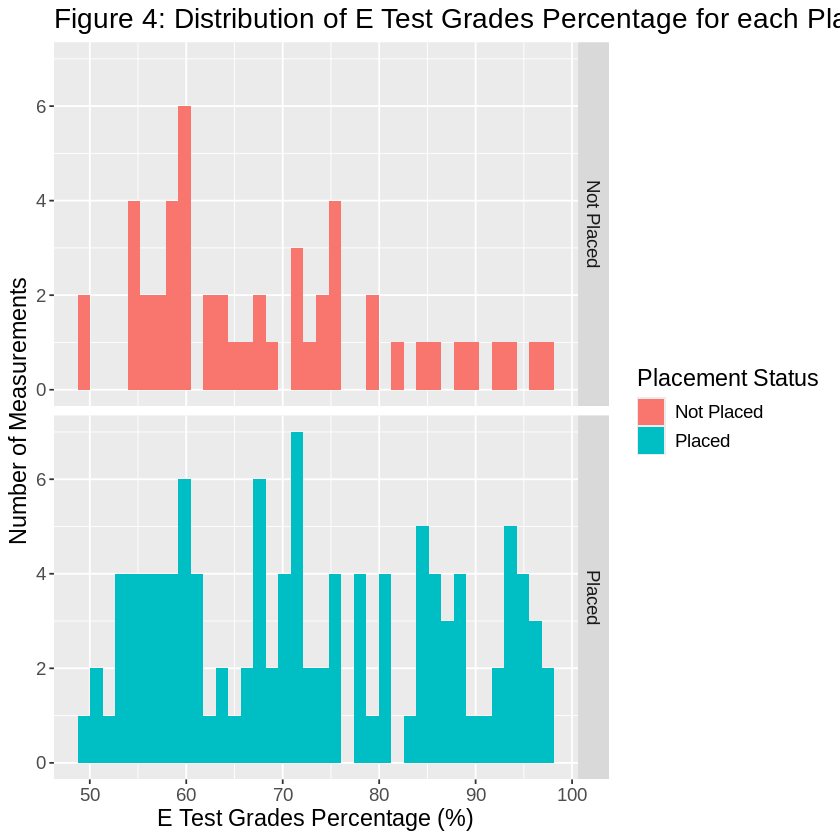

In [60]:
e_test_plot <- training_data |>
                   ggplot(aes(x = e_test_percent, fill = placement_status)) +
                   geom_histogram(bins = 30, binwidth = 1.3) +
                   facet_grid(rows = vars(placement_status)) +
                   labs(x = "E Test Grades Percentage (%)",
                   y = "Number of Measurements",
                   fill = "Placement Status") +
                   theme(text = element_text(size = 14)) +
                   ggtitle("Figure 4: Distribution of E Test Grades Percentage for each Placement")
e_test_plot

In this histogram, it looks like there is a similar distribution with both `placement_status`. However, we can see that the `Placed` status has a higher concentration in the range 80-100 when compared to `Not Placed` which still makes the center to be higher than `Not Placed` in this case.

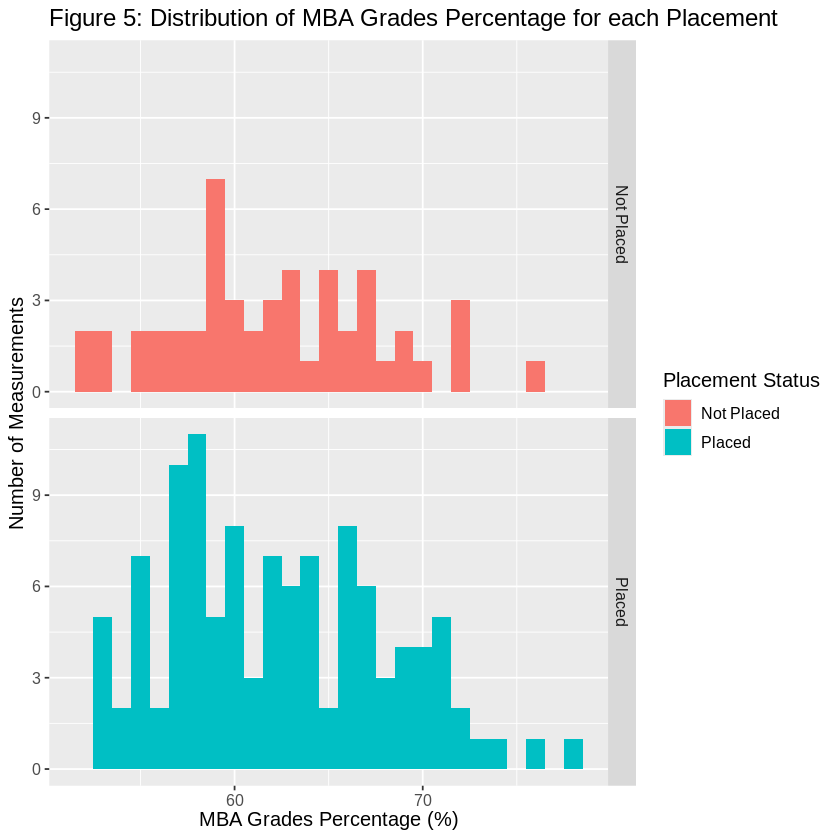

In [63]:
mba_plot <- training_data |>
                   ggplot(aes(x = mba_percent, fill = placement_status)) +
                   geom_histogram(bins = 30, binwidth = 1) +
                   facet_grid(rows = vars(placement_status)) +
                   labs(x = "MBA Grades Percentage (%)",
                   y = "Number of Measurements",
                   fill = "Placement Status") +
                   theme(text = element_text(size = 12)) +
                   ggtitle("Figure 5: Distribution of MBA Grades Percentage for each Placement")
mba_plot

Unlike all the other histogram, this plot seems to have a similar center between each `placement_status` which should be correct according to the summarization that we made when calculating the average.

Based on all the histogram for each predictors, we can clearly see that the `Placed` distribution tends to be more on the right side unlike `Not Placed`. This means there seems be a higher center for `Placed` status when compared to `Not Placed`, which will definitely help the process of classification in this project since the predictor has a distinct trend for each predictors.

After summarizing our data, we can start on answering the question by finding the best k. In order to do so, we can start on making `recipe` and standardizing the predictors with `step_scale` and `step_center`.

In [12]:
set.seed(2024)

recipe <- recipe(placement_status ~ ., data = training_data) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())
recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 5



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



We will also be using cross-validation, dividing the `training_data` into 5 folds to improvise our model on finding the best k value. We will assign them to `v_fold`. Again, we will use the `set.seed` function to make the cross-validation reproducible.

In [50]:
set.seed(2024)

v_fold <- vfold_cv(training_data, v = 5, strata = placement_status)

After that, we will make the classification spec with `knn_spec` by setting the engine with `kknn` and giving the mode in `classification`. 

In [14]:
set.seed(2024)

knn_spec <- knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Now, we will set up a tibble for `k_values` which consist of a number from 1-50.

In [15]:
k_values <- tibble(neighbors = seq(from = 1, to = 50, by = 1))
head(k_values)
tail(k_values)

neighbors
<dbl>
1
2
3
4
5
6


neighbors
<dbl>
45
46
47
48
49
50


Table 7: List of K-values from 1-50

After setting up all the requirements, we can now create the workflow and add all our new recipe with the classifier. We will use `tune_grid` for now because we want to test for all the `k_values` we've made in the previous code. We will then receive the result and and their accuracy.

In [16]:
workflow <- workflow() |>
            add_recipe(recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = v_fold, grid = k_values) |>
            collect_metrics() |>
            filter(.metric == "accuracy")
head(workflow)
tail(workflow)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7575758,5,0.03506091,Preprocessor1_Model01
2,accuracy,binary,0.7575758,5,0.03506091,Preprocessor1_Model02
3,accuracy,binary,0.8011364,5,0.00818458,Preprocessor1_Model03
4,accuracy,binary,0.8011364,5,0.00818458,Preprocessor1_Model04
5,accuracy,binary,0.8015152,5,0.02033803,Preprocessor1_Model05
6,accuracy,binary,0.8015152,5,0.02033803,Preprocessor1_Model06


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
45,accuracy,binary,0.7823864,5,0.03306457,Preprocessor1_Model45
46,accuracy,binary,0.7823864,5,0.03306457,Preprocessor1_Model46
47,accuracy,binary,0.7888258,5,0.03183143,Preprocessor1_Model47
48,accuracy,binary,0.7888258,5,0.03183143,Preprocessor1_Model48
49,accuracy,binary,0.8011364,5,0.02912451,Preprocessor1_Model49
50,accuracy,binary,0.8011364,5,0.02912451,Preprocessor1_Model50


Table 8: Metrics for each Neighbors

Now, we will set up a `ggplot` to visualize all the number of neighbors versus their cross-validation accuracy. In this way, we can see how the `k_values` behave as they increase.

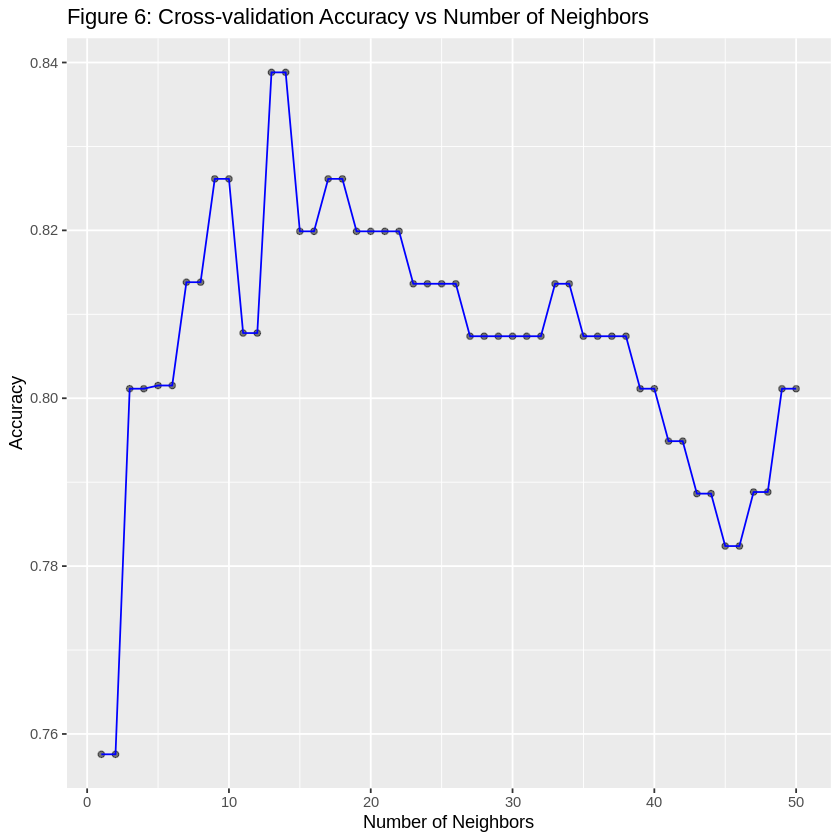

In [64]:
cross_val_plot <- workflow |>
                  ggplot(aes(x = neighbors, y = mean)) +
                  geom_point(alpha = 0.5) +
                  geom_line(color = "blue") +
                  labs(x = "Number of Neighbors", y = "Accuracy") +
                  ggtitle("Figure 6: Cross-validation Accuracy vs Number of Neighbors")
cross_val_plot

From this plot and code, we have two K-values that have the highest accuracy for predicting the most effective classification. However, we will choose the K-value to be 13 because we are trying to avoid issues such as having equal classified predictions of a new observation.

In [18]:
best_k <- workflow |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 13

After finding the best k value, we will start again by making a new spec with the `best_k` as our `neighbors`.

In [19]:
minim_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
              set_engine("kknn") |>
              set_mode("classification")
minim_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = best_k
  weight_func = rectangular

Computational engine: kknn 


We will now make a new workflow that uses the new `minim_spec`.

In [20]:
minim_fit <- workflow() |>
             add_recipe(recipe) |>
             add_model(minim_spec) |>
             fit(data = training_data)
minim_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(13,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1863354
Best kernel: rectangular
Best k: 13

After creating the new workflow, we will now start on predicting the `testing_data` using our best model. We will then bind the `testing_data` into our predictions.

In [21]:
minim_predictions <- minim_fit |>
                     predict(testing_data) |>
                     bind_cols(testing_data)
head(minim_predictions)
tail(minim_predictions)

.pred_class,sec_grade_percent,h_sec_grade_percent,degree_percent,e_test_percent,mba_percent,placement_status
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Placed,73.0,79.0,72.00,91.34,61.29,Placed
Not Placed,58.0,61.0,60.00,62.00,60.85,Placed
Not Placed,47.0,55.0,65.00,62.00,65.04,Not Placed
Placed,63.0,66.0,64.00,68.00,64.08,Not Placed
Placed,69.8,60.8,72.23,55.53,68.81,Placed
Placed,76.5,97.7,78.86,97.40,74.01,Placed


.pred_class,sec_grade_percent,h_sec_grade_percent,degree_percent,e_test_percent,mba_percent,placement_status
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Placed,65.0,77.0,69,60,61.82,Placed
Placed,88.0,72.0,78,82,71.43,Placed
Placed,78.5,65.5,67,95,64.86,Placed
Placed,74.0,73.0,73,80,67.69,Placed
Placed,58.0,60.0,72,74,53.62,Placed
Not Placed,62.0,58.0,53,89,60.22,Not Placed


Table 9: Prediction Result

### Results

After finishing all the steps, we will proceed on showing the metrics for its accuracy, precision, and recall.

In [32]:
minim_metrics <- minim_predictions |>
                 metrics(truth = placement_status, estimate = .pred_class) |>
                 filter(.metric == "accuracy")
minim_metrics

minim_prec <- minim_predictions |>
              precision(truth = placement_status, estimate = .pred_class, event_level = "second") 
minim_prec

minim_recall <- minim_predictions |>
                recall(truth = placement_status, estimate = .pred_class, event_level = "second")
minim_recall

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8888889


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.8780488


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.972973


Table 10: Accuracy, Precision, and Recall Result

To see the detail of our predictions, we can make a confusion matrix.

In [31]:
minim_conf_mat <- minim_predictions |>
                  conf_mat(truth = placement_status, estimate = .pred_class)
minim_conf_mat

            Truth
Prediction   Not Placed Placed
  Not Placed         12      1
  Placed              5     36

Table 11: Confusion Matrix Result

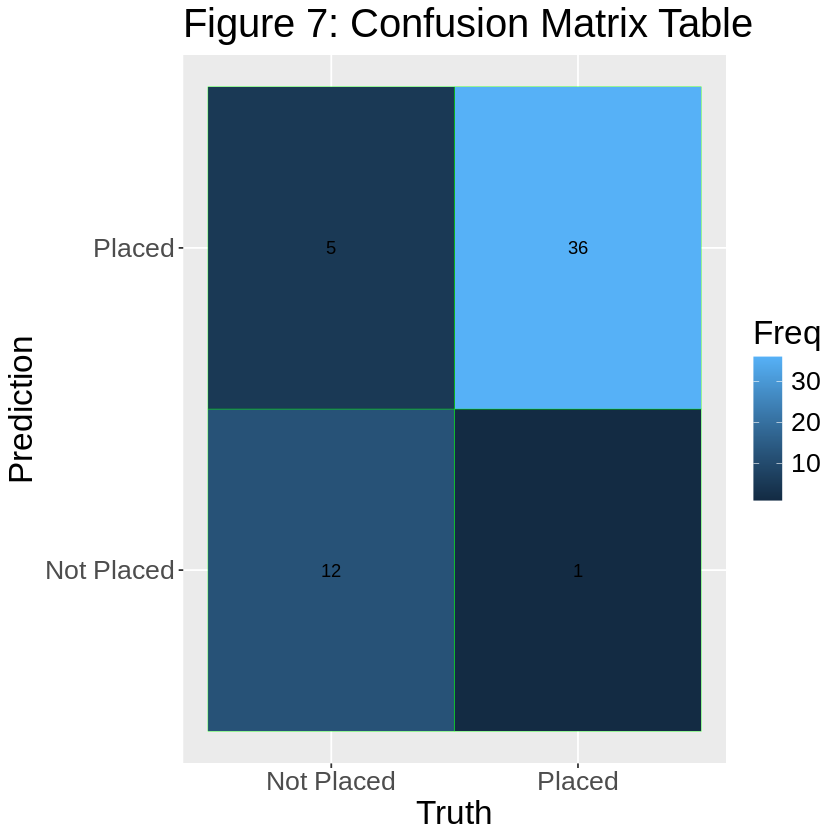

In [66]:
plt <- as.data.frame(minim_conf_mat$table)

result_graph <- plt |>
                ggplot(aes(x = Truth, y = Prediction)) +
                geom_tile(aes(fill = Freq), color = "green") +
                geom_text(aes(label = Freq)) +
                labs(x = "Truth",y = "Prediction") +
                scale_x_discrete(labels=c("Not Placed","Placed")) +
                scale_y_discrete(labels=c("Not Placed","Placed")) +
                ggtitle("Figure 7: Confusion Matrix Table") +
                theme(text = element_text(size = 20))
result_graph

# Discussion



### 1. Summarize your findings.
We can see that generally for secondary, higher secondary, and degree grade percentages, a lower grade percentage results in a lower likelihood of job placement. For no placement, it shows a right-skewed distribution for these parameters while placement had a left-skewed distribution for the same parameters. In contrast, the percentage of e-test grades resembles a different distribution across both placement and no-placement groups. In this parameter, placement resembles a roughly continuous distribution indicating that for every e-test grade, roughly the same number of people were able to secure placement. For no placement, this again shows a right-skewed distribution demonstrating that lower e-test grades appear more for the no placement. Lastly, for MBA grade percentages, both the placement and the no-placement groups showed a right-skewed distribution however this distribution was more prominent in the placement group.

(For Result, say that this model is still requiring data points hence this is still not really applicable)

### 2. Discuss whether this is what you expected to find.
We believe that these findings align well with the hypotheses that we had before conducting our investigation. Specifically, we think the findings generally agree with our hypothesis that successful placement has a better likelihood when higher grade percentages are achieved across all levels of education. Furthermore, prior research on grade assessment and job placement, specifically the study conducted by Athey et. al (2007), relatively alligned with our results, which were a positive correlation between grades and job placement. Moreover, we expected that even if the e-test percentage distribution is more variable, we denoted that this grade percentage is reflective of a single assessment so it would likely not show a skewed distribution for overall placement. Simply, we reasoned that a single measure of a given assessment is not as indicative of placement status in comparison to an overall grade percentage. Additionally, given the increased rigour of a graduate program, we also anticipated that the MBA grade percentage distributions for placement status would differ given the difficulty of the program.

### 3. Discuss what impact could such findings have.
Our findings can positively impact relevant demographics by providing a coherent way to provide relevant feedback for future applicants to tune their applications to be more competitive. Specifically, these findings can be used as a resource to provide peace of mind to any individuals hoping to enter the workforce, as they are able to more accurately gauge where they fall in comparison to their competitors. Furthermore, institutions can use the data to improve the resources and opportunities for students to succeed, like changing curriculum at specific levels of education to better prepare students. For example, career counselors and advisors can utilize these findings to provide more tailored guidance to students and job seekers. By understanding the competitive landscape and industry trends, counselors can offer targeted advice on career pathways and skill development.

### 4. Discuss what future questions could this lead to.
<p >Our findings can serve as a foundational framework for addressing many future inquiries about education, work experience, and career outcomes. For instance, they can provide valuable insights into whether employers exhibit a preference for new graduate students with prior work placement experience, thereby informing hiring practices and guiding students in their career preparation efforts. Simply, this can help to answer other questions in the future such as “do employers have a preference for new graduate students that have previous work placement?” Moreover, the findings can facilitate a deeper exploration of work placement as an independent variable, allowing researchers to investigate specific questions such as how GPA requirements for placements vary across different industries. Additionally, by considering work experience alongside academic achievements, researchers can reevaluate conventional expectations and decision-making criteria, ultimately leading to a more holistic understanding of skillset and career success prediction. <br>
Further research upon this relationship between grades and job placement can also help researchers delve into more specific connections. For example, perhaps students with good grades are often associated with specific personality types or having access to resources that would put them ahead in the job market. As Athey et. al (2007) states, "the traits that enable a student to do well in the first-year of graduate school, such as high cognitive ability and dilligence, are also important when it comes to writing a dissertation and searching for a job." Perhaps researchers can explore the incorporation of industry knowledge in educational courses as a precursor to success in the job market or further research how employers select potential candidates straight out of school. </p>b.


### References




Campus Recruitment. (2020, April 11). Kaggle. https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data
<br>
Athey, S., Katz, L. F., Krueger, A. B., Levitt, S., & Poterba, J. (2007). What does performance in graduate school predict? Graduate Economics Education and student outcomes. American Economic Review, 97(2), 512–518. https://doi.org/10.1257/aer.97.2.512 
<br>
Athey, S., Katz, L. F., Krueger, A. B., Levitt, S., & Poterba, J. (2007). What does performance in graduate school predict? Graduate Economics Education and student outcomes. American Economic Review, 97(2), 512–518. https://doi.org/10.1257/aer.97.2.512 